In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [246]:
poke=pd.read_csv('pokemon.csv')

In [247]:
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [248]:
poke.shape

(800, 13)

In [249]:
poke.rename(columns={'Type 1': 'Primary_Type','Type 2': 'Secondary_Type'},inplace=True)

In [250]:
poke.head()

,#,Name,Primary_Type,Secondary_Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [251]:
poke.isnull().sum()

,0
#,0
Name,0
Primary_Type,0
Secondary_Type,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [252]:
poke['Secondary_Type'].mode()

,Secondary_Type
0,Flying


In [253]:
poke['Secondary_Type']=poke['Secondary_Type'].fillna('Flying')

In [254]:
poke.isnull().sum()

,0
#,0
Name,0
Primary_Type,0
Secondary_Type,0
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [255]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   #               800 non-null    int64 
 1   Name            800 non-null    object
 2   Primary_Type    800 non-null    object
 3   Secondary_Type  800 non-null    object
 4   Total           800 non-null    int64 
 5   HP              800 non-null    int64 
 6   Attack          800 non-null    int64 
 7   Defense         800 non-null    int64 
 8   Sp. Atk         800 non-null    int64 
 9   Sp. Def         800 non-null    int64 
 10  Speed           800 non-null    int64 
 11  Generation      800 non-null    int64 
 12  Legendary       800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [256]:
poke["Primary_Type"].value_counts()


,count
Primary_Type,
Water,112
Normal,98
Grass,70
Bug,69
Psychic,57
Fire,52
Rock,44
Electric,44
Ground,32


In [257]:
poke["Primary_Type"].nunique()


18

In [258]:
grass_pokemon=poke[poke['Primary_Type']=='Grass']

In [259]:
grass_pokemon.head()

,#,Name,Primary_Type,Secondary_Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False


In [260]:
Water_pokemon=poke[poke['Primary_Type']=='Water']

In [261]:
Water_pokemon.head()

,#,Name,Primary_Type,Secondary_Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,7,Squirtle,Water,Flying,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,Flying,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,Flying,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,Flying,630,79,103,120,135,115,78,1,False
59,54,Psyduck,Water,Flying,320,50,52,48,65,50,55,1,False


In [262]:
Fire_pokemon=poke[poke['Primary_Type']=='Fire']

In [263]:
Fire_pokemon.head()

,#,Name,Primary_Type,Secondary_Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Flying,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [264]:
poke.shape

(800, 13)

In [265]:
grass_pokemon.shape

(70, 13)

In [266]:
Water_pokemon.shape

(112, 13)

In [267]:
Fire_pokemon.shape

(52, 13)

In [268]:
(112+52+112)/800

0.345

In [269]:
grass_pokemon.head()

,#,Name,Primary_Type,Secondary_Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False


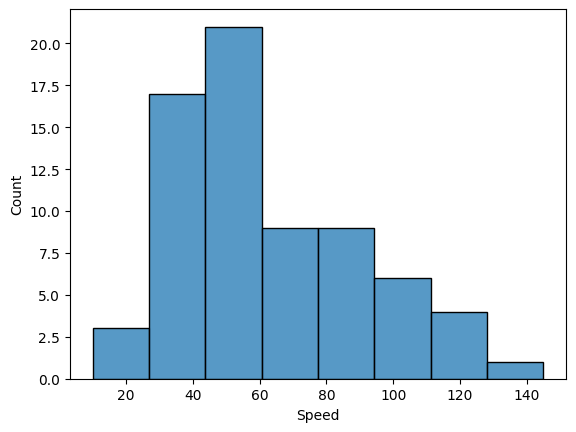

In [270]:
sns.histplot(grass_pokemon['Speed'])
plt.show()

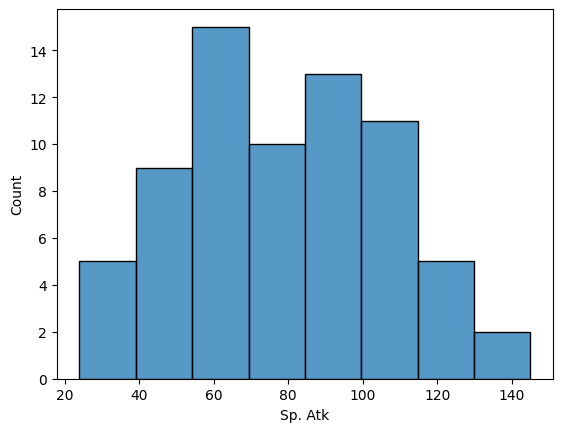

In [271]:
sns.histplot(grass_pokemon['Sp. Atk'])
plt.show()

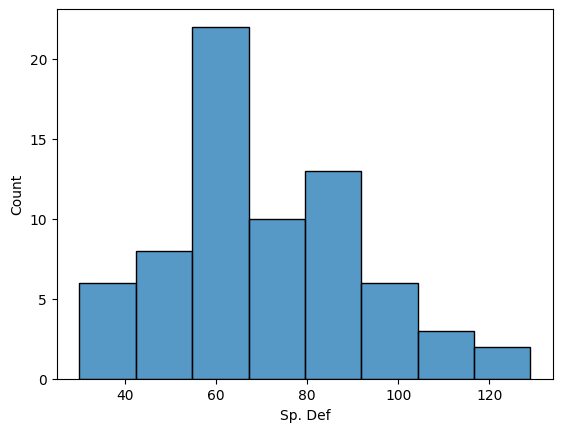

In [272]:
sns.histplot(grass_pokemon['Sp. Def'])
plt.show()

In [273]:
grass_pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,344.871429,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143
std,200.264385,106.650626,19.516564,25.380520,24.485192,27.244864,21.446645,28.506456,1.579173
min,1.000000,180.000000,30.000000,27.000000,30.000000,24.000000,30.000000,10.000000,1.000000
25%,187.250000,318.500000,51.250000,55.000000,50.000000,57.000000,55.000000,40.000000,2.000000
50%,372.000000,430.000000,65.500000,70.000000,66.000000,75.000000,66.000000,58.500000,3.500000
75%,496.750000,497.000000,75.000000,93.500000,84.500000,99.500000,85.000000,80.000000,5.000000
max,673.000000,630.000000,123.000000,132.000000,131.000000,145.000000,129.000000,145.000000,6.000000


In [274]:
Water_pokemon.head()

,#,Name,Primary_Type,Secondary_Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,7,Squirtle,Water,Flying,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,Flying,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,Flying,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,Flying,630,79,103,120,135,115,78,1,False
59,54,Psyduck,Water,Flying,320,50,52,48,65,50,55,1,False


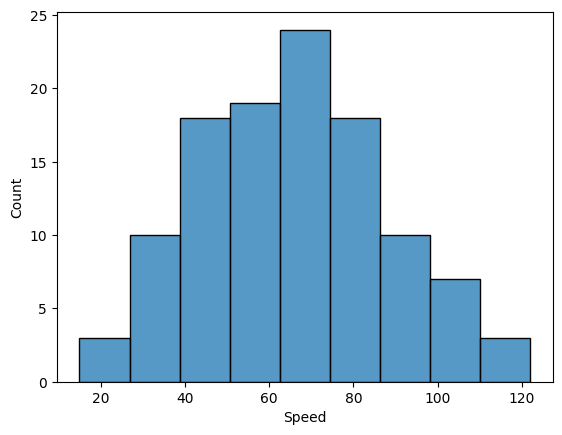

In [275]:
sns.histplot(Water_pokemon['Speed'])
plt.show()

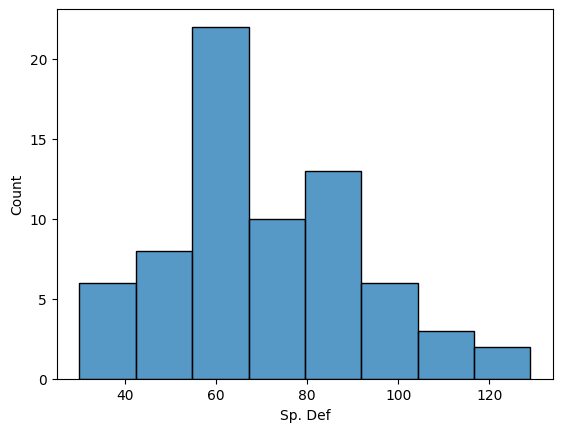

In [276]:
sns.histplot(grass_pokemon['Sp. Def'])
plt.show()

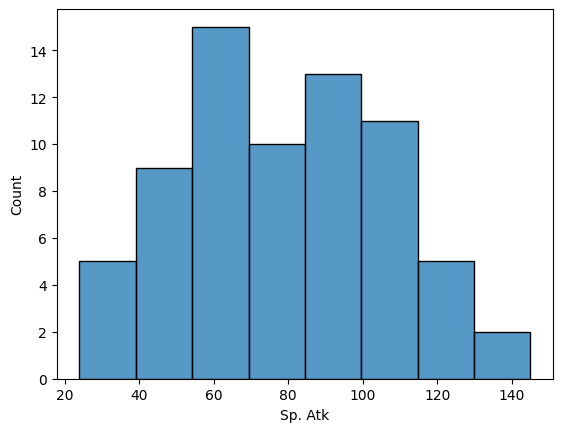

In [277]:
sns.histplot(grass_pokemon['Sp. Atk'])
plt.show()

In [278]:
Water_pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,303.089286,430.455357,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143
std,188.440807,113.188266,27.487026,28.377192,27.773809,29.030128,28.460493,23.019353,1.558800
min,7.000000,200.000000,20.000000,10.000000,20.000000,10.000000,20.000000,15.000000,1.000000
25%,130.000000,328.750000,52.250000,53.000000,54.500000,55.000000,50.000000,50.000000,1.000000
50%,275.000000,455.000000,70.000000,72.000000,70.000000,70.000000,65.000000,65.000000,3.000000
75%,456.250000,502.250000,90.250000,92.000000,88.500000,90.500000,89.250000,82.000000,4.000000
max,693.000000,770.000000,170.000000,155.000000,180.000000,180.000000,160.000000,122.000000,6.000000


In [279]:
grass_pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,344.871429,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143
std,200.264385,106.650626,19.516564,25.380520,24.485192,27.244864,21.446645,28.506456,1.579173
min,1.000000,180.000000,30.000000,27.000000,30.000000,24.000000,30.000000,10.000000,1.000000
25%,187.250000,318.500000,51.250000,55.000000,50.000000,57.000000,55.000000,40.000000,2.000000
50%,372.000000,430.000000,65.500000,70.000000,66.000000,75.000000,66.000000,58.500000,3.500000
75%,496.750000,497.000000,75.000000,93.500000,84.500000,99.500000,85.000000,80.000000,5.000000
max,673.000000,630.000000,123.000000,132.000000,131.000000,145.000000,129.000000,145.000000,6.000000


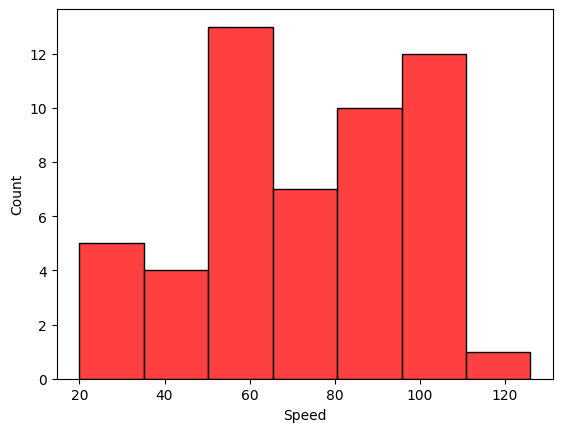

In [280]:
sns.histplot(Fire_pokemon['Speed'],color='red')
plt.show()

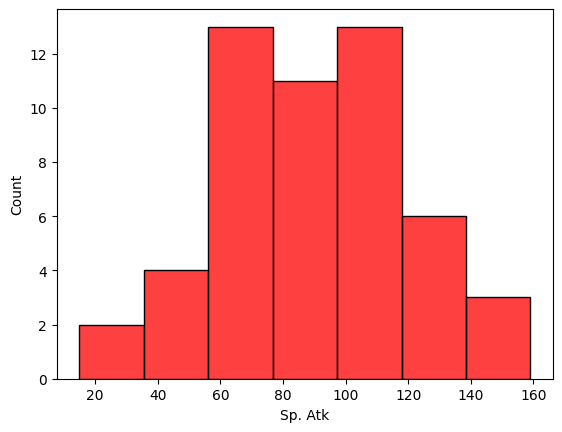

In [281]:
sns.histplot(Fire_pokemon['Sp. Atk'],color='red')
plt.show()

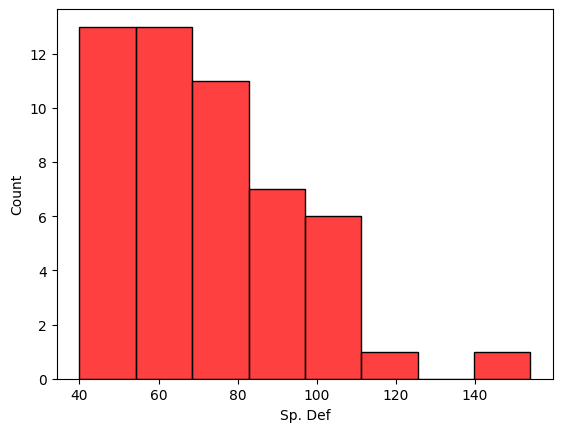

In [282]:
sns.histplot(Fire_pokemon['Sp. Def'],color='red')
plt.show()

In [283]:
Fire_pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538
std,226.262840,109.760496,19.404123,28.769275,23.658200,30.042121,22.619908,25.245783,1.850665
min,4.000000,250.000000,38.000000,30.000000,37.000000,15.000000,40.000000,20.000000,1.000000
25%,143.500000,368.000000,58.000000,62.250000,51.000000,70.000000,54.750000,60.000000,1.000000
50%,289.500000,482.000000,70.000000,84.500000,64.000000,85.000000,67.500000,78.500000,3.000000
75%,513.250000,534.000000,80.000000,101.000000,78.000000,109.000000,85.000000,96.250000,5.000000
max,721.000000,680.000000,115.000000,160.000000,140.000000,159.000000,154.000000,126.000000,6.000000


In [284]:
Water_pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,303.089286,430.455357,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143
std,188.440807,113.188266,27.487026,28.377192,27.773809,29.030128,28.460493,23.019353,1.558800
min,7.000000,200.000000,20.000000,10.000000,20.000000,10.000000,20.000000,15.000000,1.000000
25%,130.000000,328.750000,52.250000,53.000000,54.500000,55.000000,50.000000,50.000000,1.000000
50%,275.000000,455.000000,70.000000,72.000000,70.000000,70.000000,65.000000,65.000000,3.000000
75%,456.250000,502.250000,90.250000,92.000000,88.500000,90.500000,89.250000,82.000000,4.000000
max,693.000000,770.000000,170.000000,155.000000,180.000000,180.000000,160.000000,122.000000,6.000000


In [285]:
poke.head()

,#,Name,Primary_Type,Secondary_Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False


In [286]:
poke['Legendary'].value_counts()

,count
Legendary,
False,735
True,65


In [287]:
x = poke[['Speed']]
y = poke[['Legendary']]

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [290]:
from sklearn.tree import DecisionTreeClassifier

In [291]:
dtc = DecisionTreeClassifier()

In [292]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [293]:
y_pred=dtc.predict(x_test)

In [294]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [295]:
confusion_matrix(y_test,y_pred)

array([[218,   7],
       [ 14,   1]])

In [296]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9125


In [297]:
(218+1)/(218+1+14+7)

0.9125

In [298]:
poke.head()

,#,Name,Primary_Type,Secondary_Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False


In [299]:
x = poke[['Defense']]
y = poke[['Attack']]

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [302]:
from sklearn.tree import DecisionTreeRegressor

In [303]:
dtr = DecisionTreeRegressor()

In [304]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [306]:
y_pred=dtr.predict(x_test)

In [308]:
y_pred[0:5]

array([100.52173913,  88.77777778,  64.92307692,  65.        ,
        72.72727273])

In [309]:
from sklearn.metrics import mean_squared_error

In [310]:
mean_squared_error(y_test,y_pred)

1004.8781476584061